In [3]:
pip install -r "C:\Users\wasi\Desktop\Capstone-project-Property-Price-Prediction-model\requirements.txt"


  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 11.4 MB/s eta 

In [4]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import pymysql
import pyodbc


In [5]:
# Load .env variables
from dotenv import load_dotenv
print(load_dotenv())

True


In [6]:
# Create MySQL connection (AWS RDS)
mysql_engine = create_engine(
    f"mysql+pymysql://{os.getenv('MYSQL_USER')}:{os.getenv('MYSQL_PASS')}@{os.getenv('MYSQL_HOST')}/{os.getenv('MYSQL_DB')}"
)

# Create MSSQL connection
mssql_engine = create_engine(
    f"mssql+pyodbc://{os.getenv('MSSQL_USER')}:{os.getenv('MSSQL_PASS')}@{os.getenv('MSSQL_HOST')}/{os.getenv('MSSQL_DB')}?driver={os.getenv('MSSQL_DRIVER')}&Encrypt=yes&TrustServerCertificate=no"
)

In [8]:
#  Read from AWS MySQL
df = pd.read_sql("SELECT * FROM gurgaon_properties_cleaned_v2", con=mysql_engine)
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,...,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,...,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,...,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,...,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,...,NaN,NaN,2880.0,0,1,0,0,0,2,49


In [9]:
df.shape

(3675, 23)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
### property_type vs price

<Axes: xlabel='property_type', ylabel='price'>

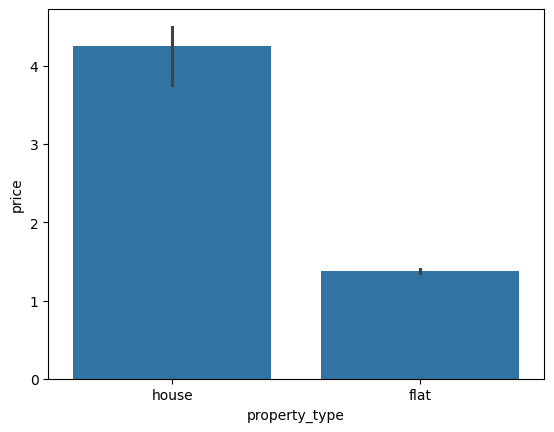

In [14]:
sns.barplot(x=df['property_type'], y=df['price'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price'>

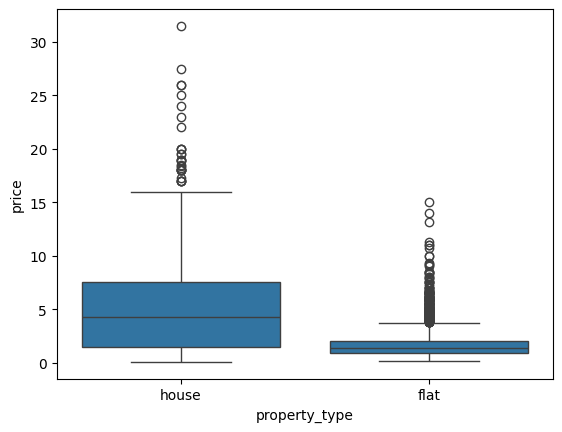

In [23]:
sns.boxplot(x=df['property_type'], y=df['price'])


In [24]:
### property_type vs area


<Axes: xlabel='property_type', ylabel='built_up_area'>

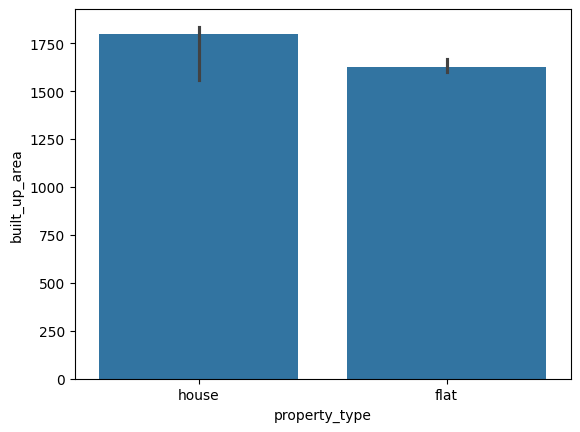

In [25]:
sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='built_up_area'>

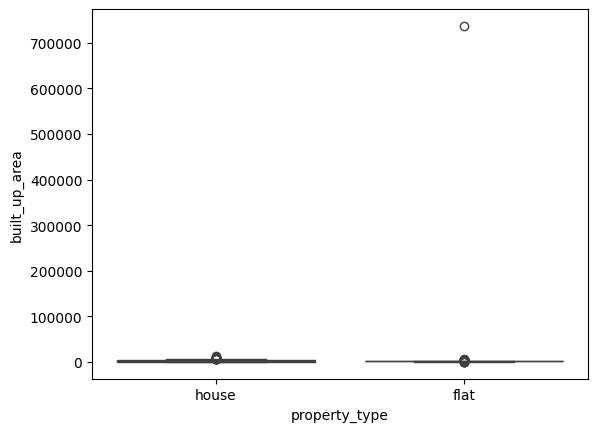

In [26]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [29]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

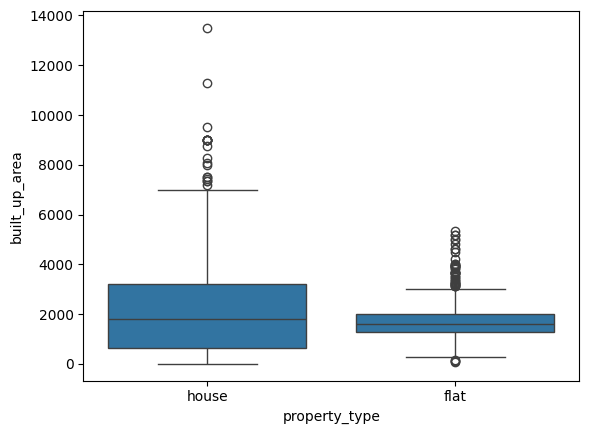

In [30]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [31]:
### property_type vs price_per_sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

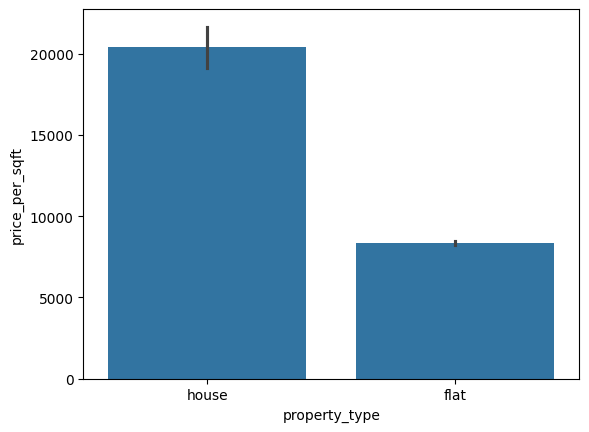

In [32]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

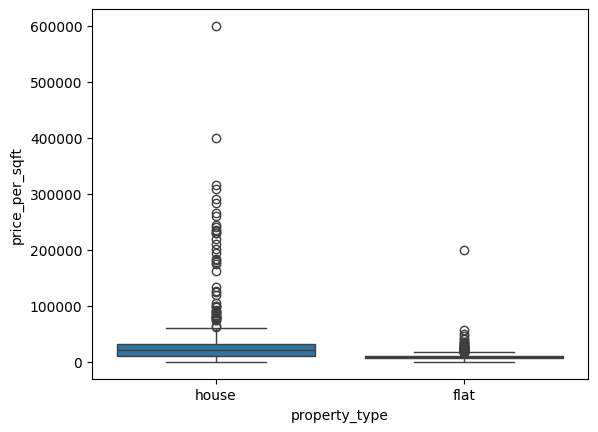

In [33]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [34]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
31,house,Eros Rosewood Villas,sector 49,2.75,178571.0,154.0,Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...,NaN,NaN,1650.0
117,house,Unitech Deerwood Chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),NaN,359.0,NaN
189,house,Ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
202,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
239,house,Ardee City3.8 ★,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
340,house,"bhim nagar, sector 6",sector 6,0.85,126865.0,67.0,Plot area 67(6.22 sq.m.),NaN,67.0,NaN
1085,house,DLF The Grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),NaN,270.0,NaN
1179,house,Vipul Tatvam Villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN
1319,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 s...,NaN,160.0,150.0
1482,house,RK Excelo,sector 12,0.60,120000.0,50.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,NaN,30.0,15.0


In [35]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,1,South,Moderately Old,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,7,NA,New Property,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,0,West,Moderately Old,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,5,South-East,Relatively New,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,5,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49


<Axes: xlabel='bedRoom', ylabel='property_type'>

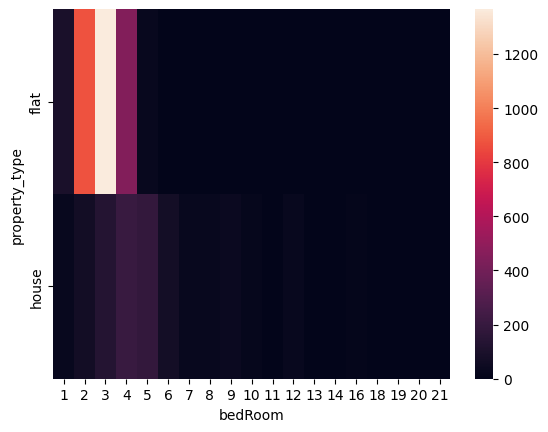

In [36]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

In [37]:
# checking outliers
df[df['bedRoom'] >= 10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
35,house,independent,sohna road road,0.95,8920.0,1065.0,Plot area 1065(98.94 sq.m.),10,10,3+,3,NA,New Property,NaN,1065.0,NaN,0,0,0,0,0,0,0
235,house,Uppal Southend4.0 ★,sector 49,6.75,32328.0,2088.0,Plot area 232(193.98 sq.m.),12,12,3+,3,North,Moderately Old,NaN,2088.0,NaN,1,1,0,1,1,2,49
268,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38
285,house,independent,sector 28,NaN,NaN,NaN,Plot area 270(225.75 sq.m.),16,16,3+,4,North-West,New Property,NaN,270.0,NaN,1,1,0,1,1,0,41
408,house,independent,sector 24,3.20,59259.0,540.0,Plot area 60(50.17 sq.m.),14,14,3+,6,West,Relatively New,NaN,540.0,NaN,0,0,0,0,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,house,independent,sector 13,9.00,100000.0,900.0,Plot area 900(83.61 sq.m.),10,5,3+,4,NA,Old Property,NaN,900.0,NaN,0,0,0,0,0,0,0
3500,house,Laxmi Garden Sector-11,sector 11,1.50,12820.0,1170.0,Plot area 130(108.7 sq.m.),12,9,1,3,East,Relatively New,NaN,1170.0,NaN,1,1,0,1,1,2,106
3568,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,1,137
3596,house,independent,sector 25,NaN,NaN,NaN,Plot area 250(209.03 sq.m.)Built Up area: 260 ...,12,12,3+,4,North-East,New Property,NaN,260.0,245.0,1,1,0,1,1,1,144


<Axes: xlabel='property_type', ylabel='floorNum'>

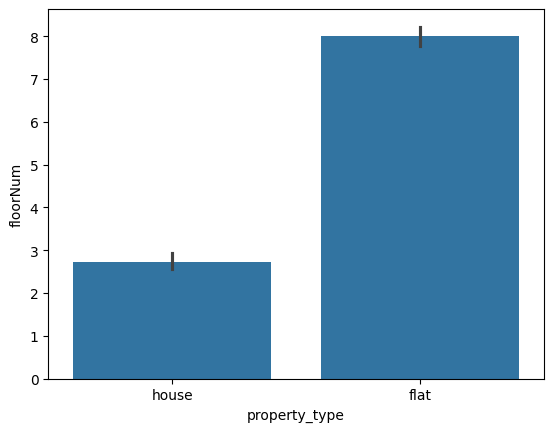

In [38]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

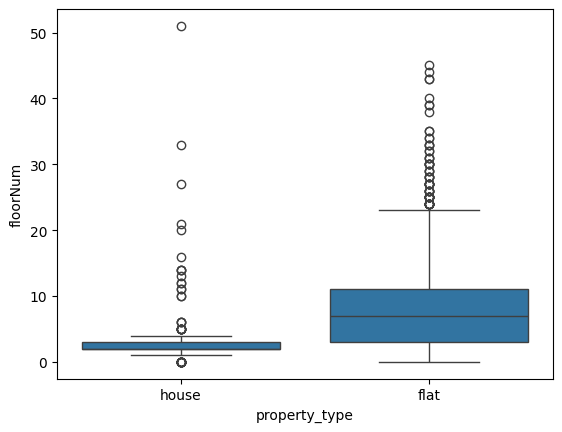

In [40]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])

In [41]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
105,house,Satya The Hermitage3.5 ★,sector 103,3.15,6702.0,4700.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,12,East,Undefined,NaN,4700.0,NaN,0,0,0,0,0,0,0
167,house,Vatika The Seven Lamps3.8 ★,sector 82,1.60,6597.0,2425.0,Plot area 2425(225.29 sq.m.),4,4,3+,16,North,Moderately Old,NaN,2425.0,NaN,0,1,0,0,0,0,94
206,house,Spaze Privy3.9 ★,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5,5,3+,21,NA,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0
325,house,Ireo Victory Valley4.1 ★,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,51,North-East,Moderately Old,NaN,3600.0,NaN,1,1,0,1,0,2,49
586,house,ATS Tourmaline3.9 ★,sector 109,1.87,8697.0,2150.0,Built Up area: 2150 (199.74 sq.m.),3,4,0,12,NA,Undefined,NaN,2150.0,NaN,0,0,0,0,0,0,0
768,house,Ninex City,sector 76,1.75,6250.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4,4,0,14,NA,Undefined,NaN,NaN,2800.0,0,0,0,0,0,0,0
1252,house,Spaze Privy3.9 ★,sector 72,3.09,6981.0,4426.0,Built Up area: 3653 (339.37 sq.m.)Carpet area:...,5,5,3+,14,East,Relatively New,NaN,3653.0,2922.0,0,1,0,0,0,2,33
1266,house,Suncity Township4.1 ★,sector 54,2.00,30968.0,646.0,Plot area 60Built Up area: 60 sq.m.Carpet area...,9,9,3,11,North,Relatively New,NaN,60.0,59.0,0,1,0,0,0,1,7
1425,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13,NA,Undefined,NaN,2360.0,NaN,0,0,0,0,0,0,0
1571,house,Suncity Avenue 76,sector 76,0.75,10067.0,745.0,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,2,2,2,11,North-East,New Property,NaN,745.0,NaN,0,0,0,0,0,0,40


<Axes: xlabel='agePossession', ylabel='property_type'>

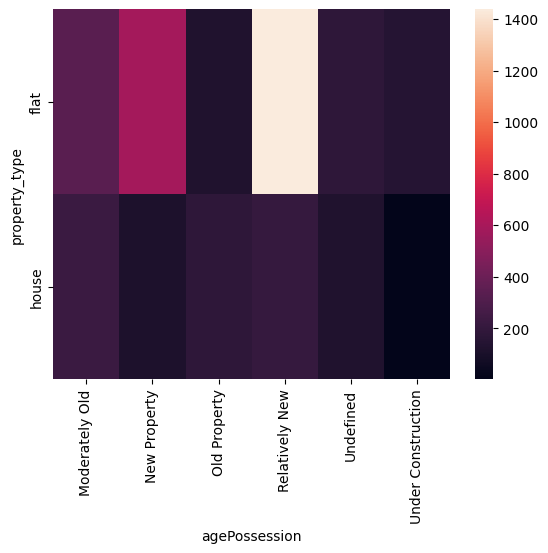

In [42]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

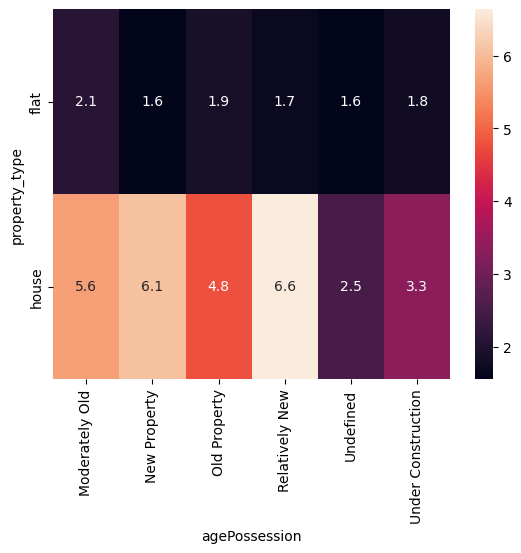

In [43]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)

In [44]:
pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean')

agePossession,Moderately Old,New Property,Old Property,Relatively New,Undefined,Under Construction
property_type,,,,,,
flat,2.102196,1.559763,1.881870,1.682962,1.567151,1.786757
house,5.640905,6.075446,4.778715,6.634577,2.520000,3.337500


<Axes: xlabel='bedRoom', ylabel='property_type'>

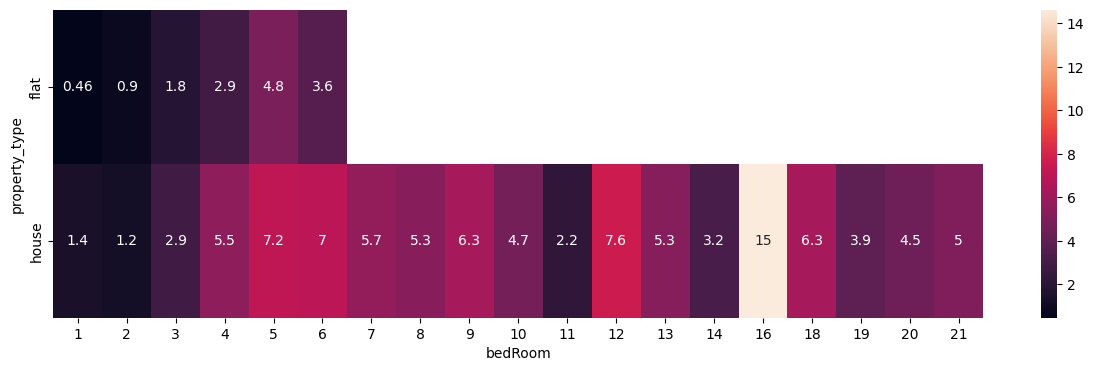

In [45]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='furnishing_type', ylabel='property_type'>

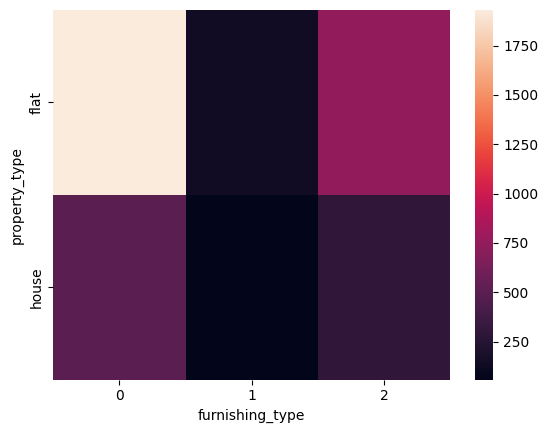

In [46]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

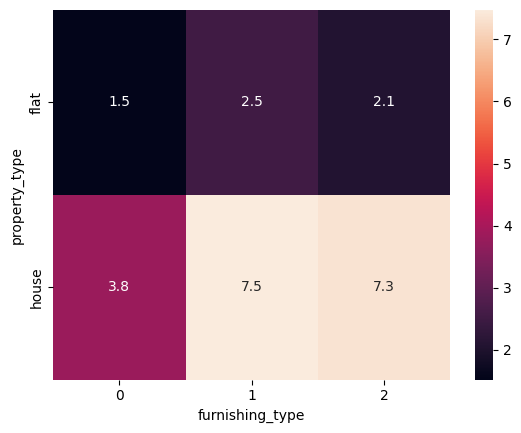

In [47]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)


<Axes: xlabel='property_type', ylabel='luxury_score'>

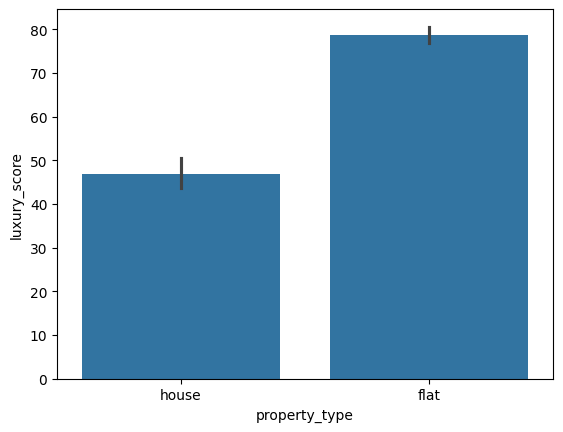

In [48]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

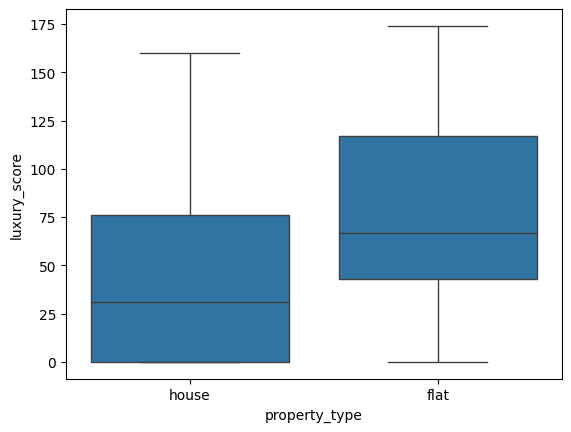

In [49]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])


In [50]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,1,South,Moderately Old,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,7,NA,New Property,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,0,West,Moderately Old,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,5,South-East,Relatively New,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,5,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49


<Axes: xlabel='sector', ylabel='property_type'>

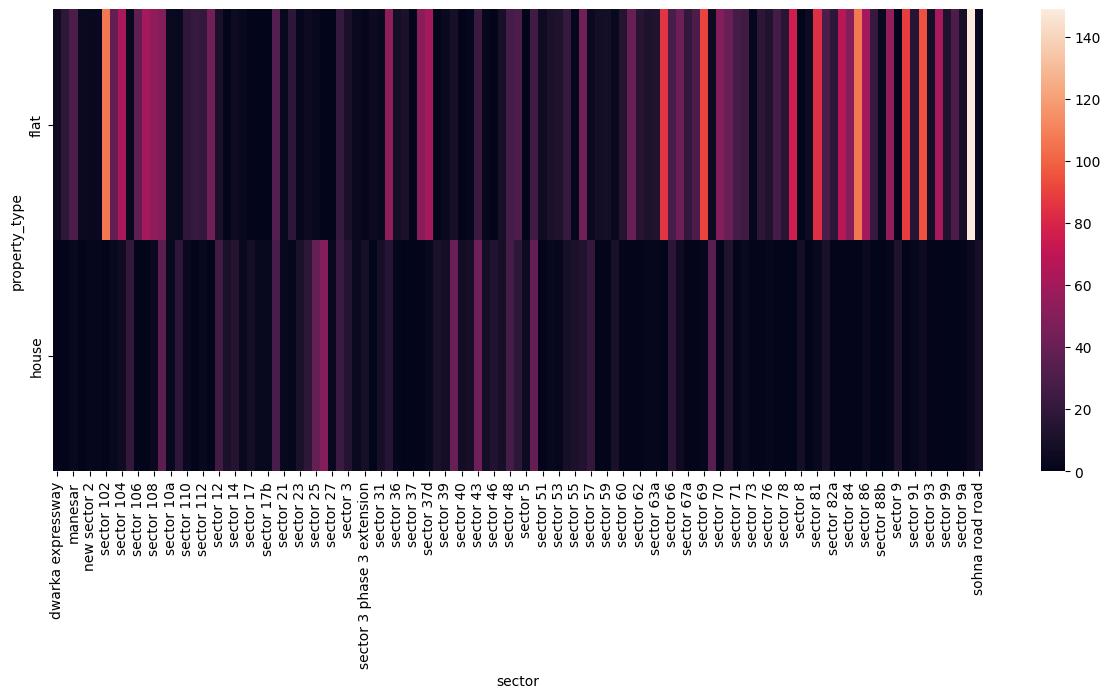

In [51]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

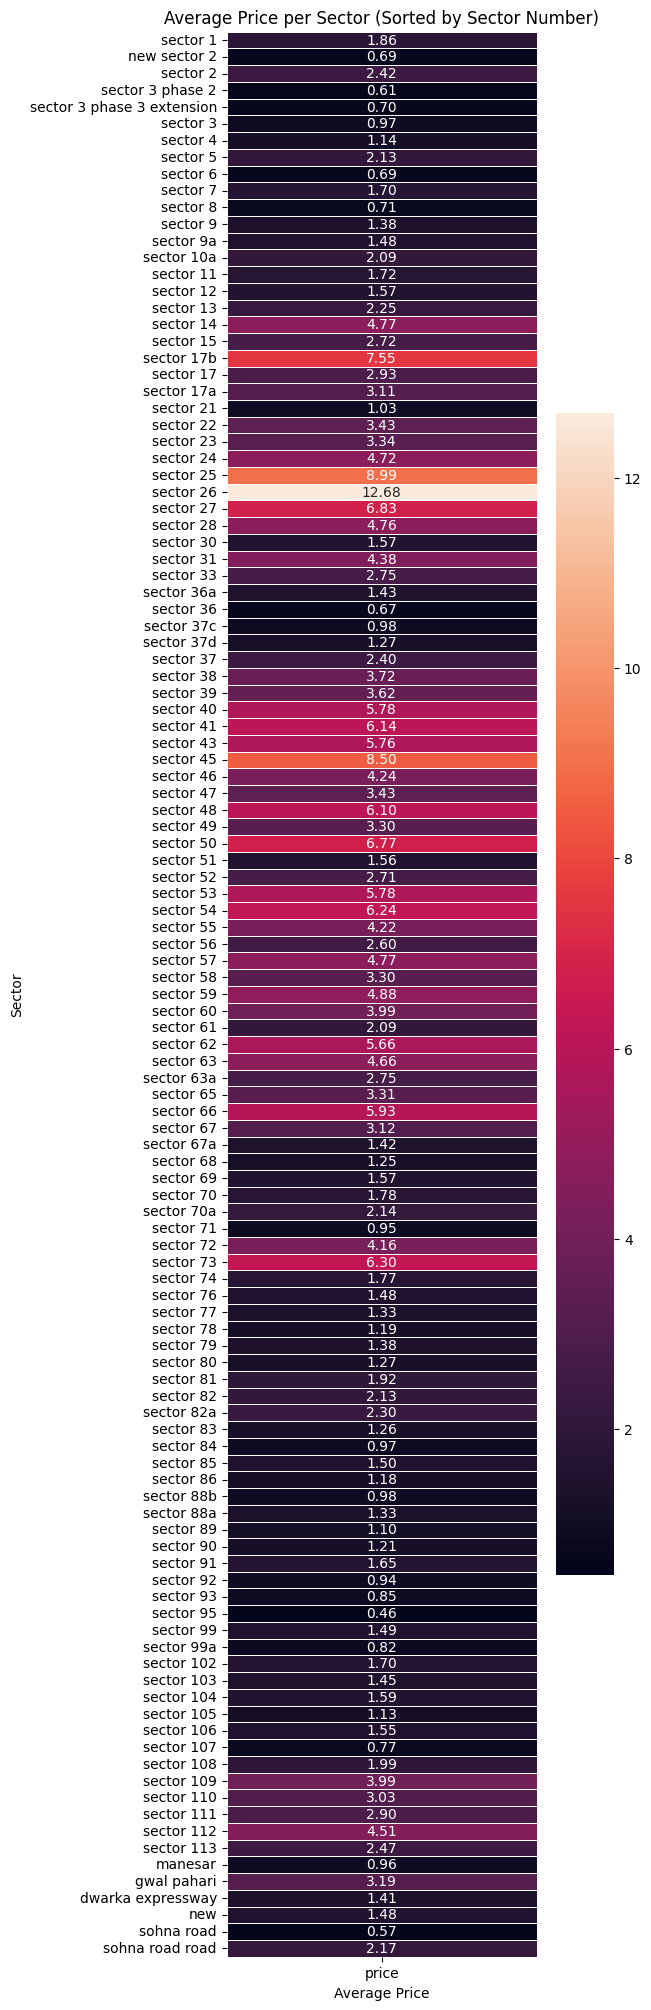

In [52]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()


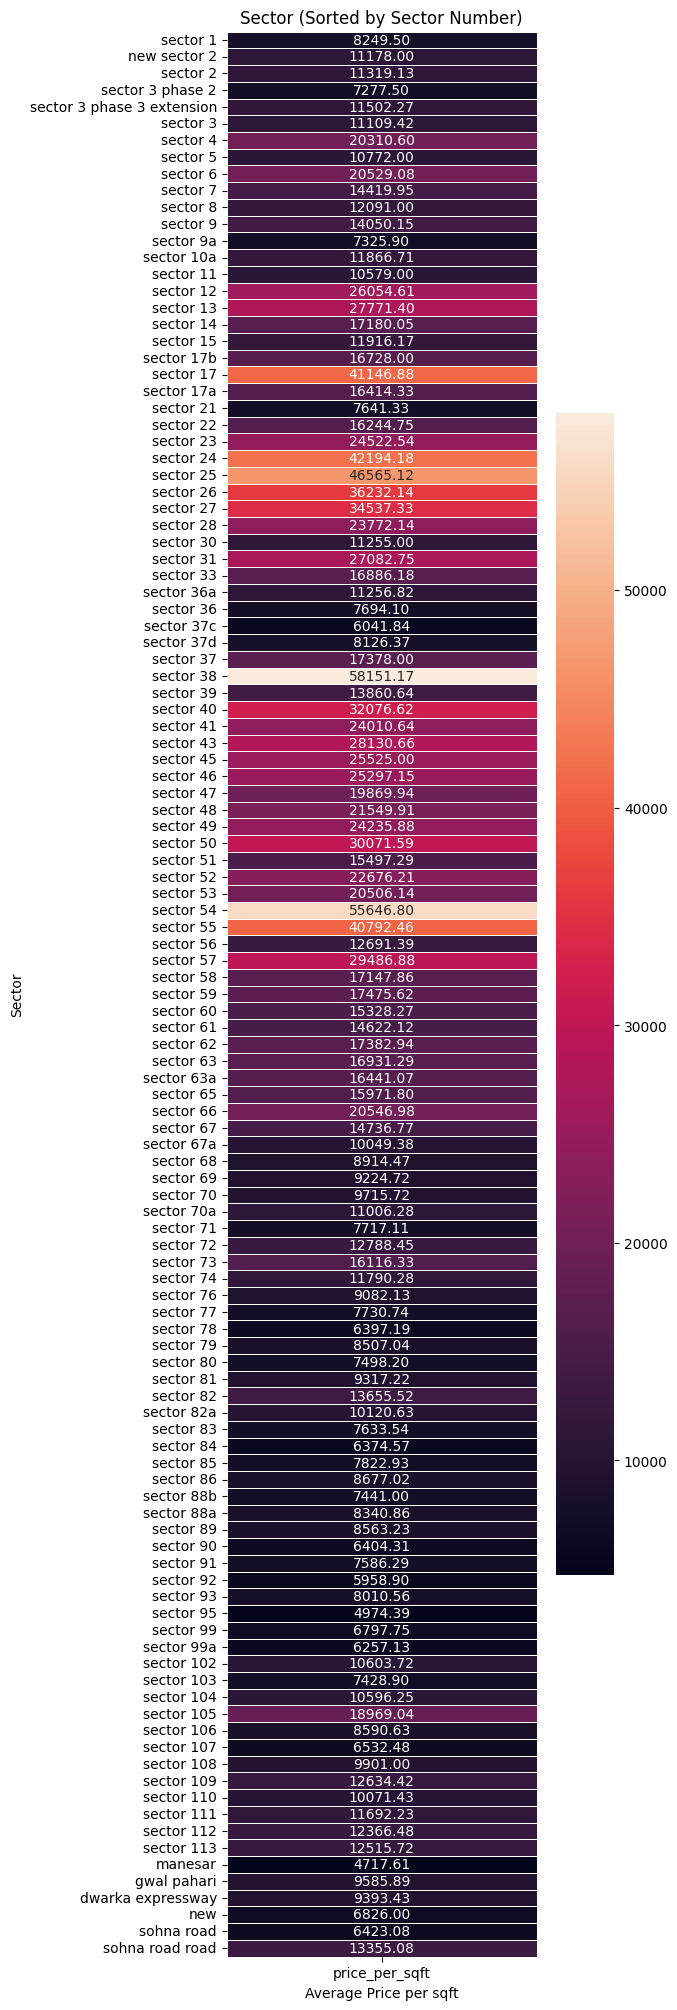

In [53]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

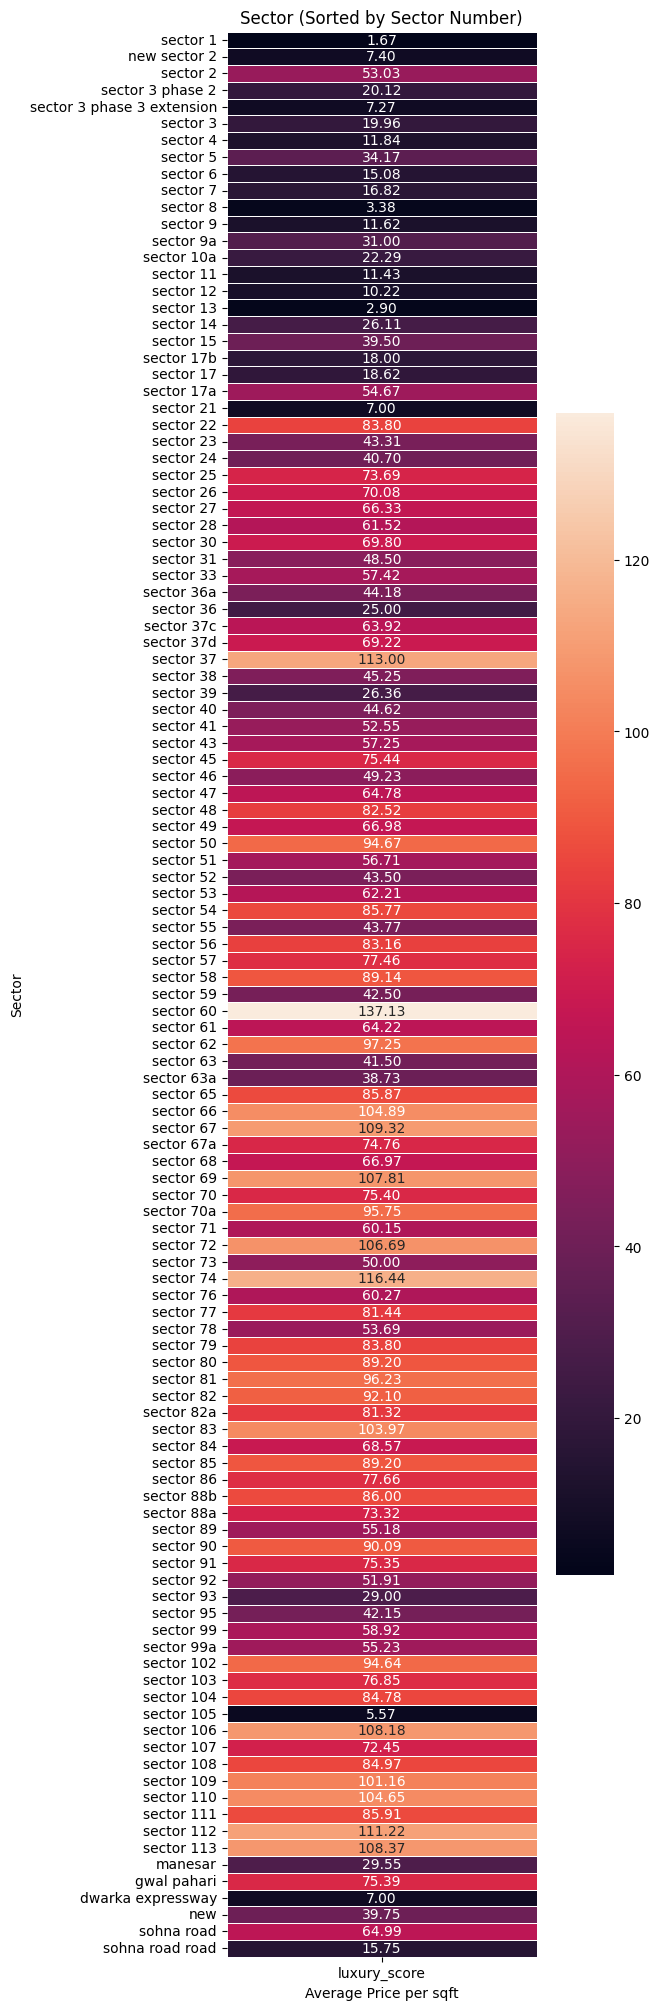

In [54]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

In [55]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,1,South,Moderately Old,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,7,NA,New Property,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,0,West,Moderately Old,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,5,South-East,Relatively New,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,5,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49


In [56]:
### price

<Axes: xlabel='area', ylabel='price'>

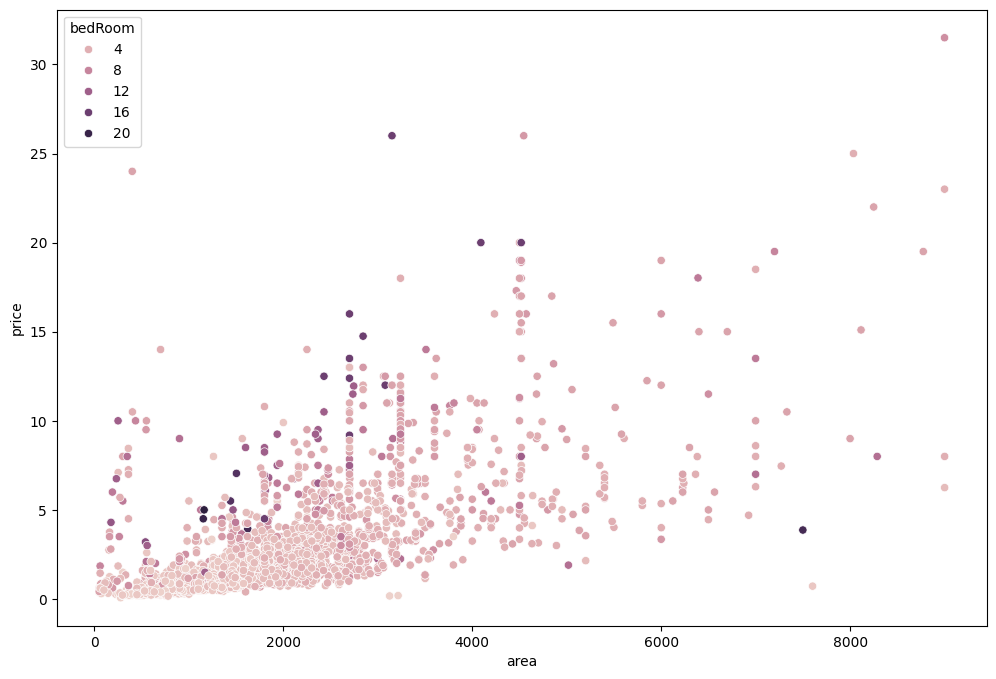

In [61]:
# Filter the DataFrame once
filtered_df = df[df['area'] < 10000]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='area', y='price', hue='bedRoom')

<Axes: xlabel='area', ylabel='price'>

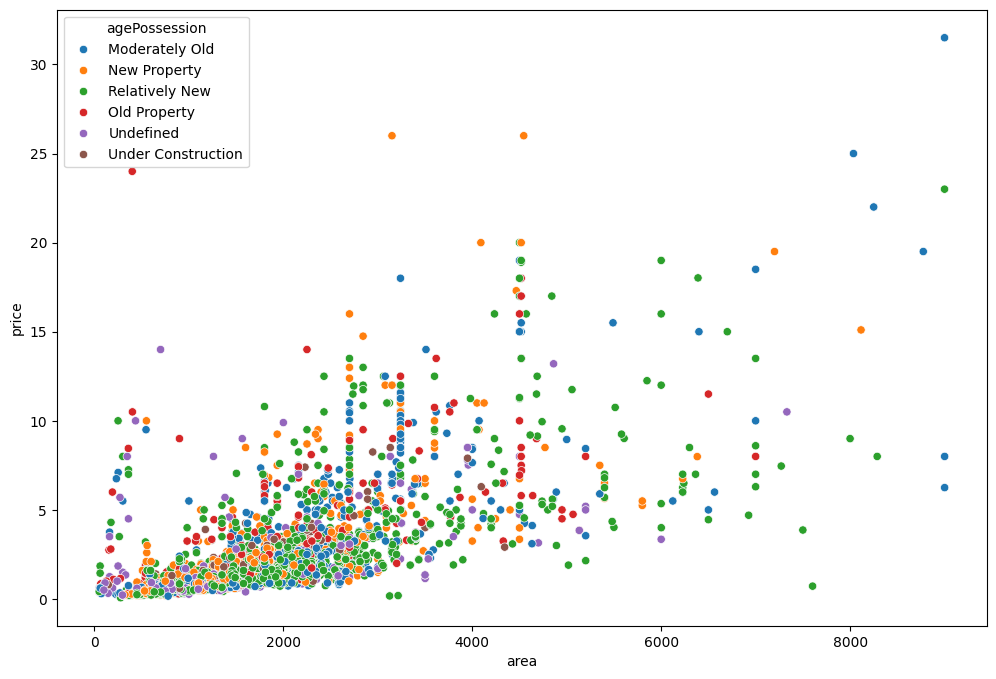

In [62]:
filtered_df = df[df['area'] < 10000]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='area', y='price', hue='agePossession')

<Axes: xlabel='area', ylabel='price'>

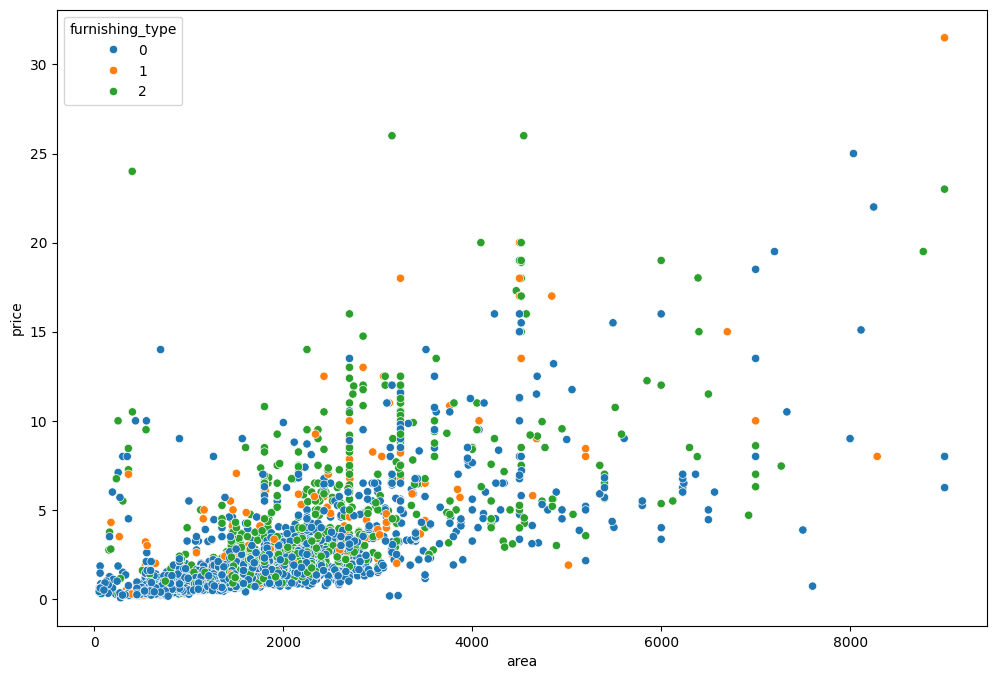

In [ ]:
# Filter the whole DataFrame
filtered_df = df[df['area'] < 10000]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_df, x='area', y='price', hue=filtered_df['furnishing_type'].astype('category')) 

<Axes: xlabel='bedRoom', ylabel='price'>

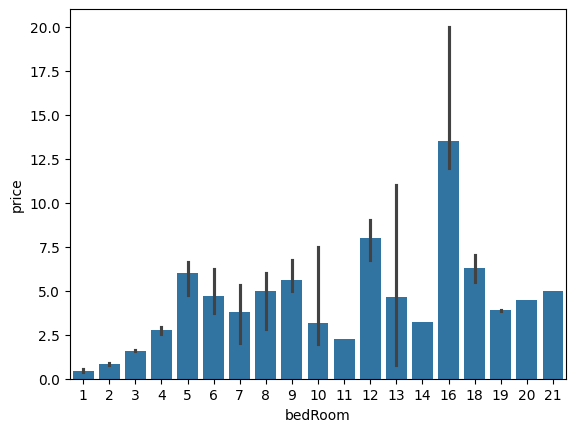

In [66]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

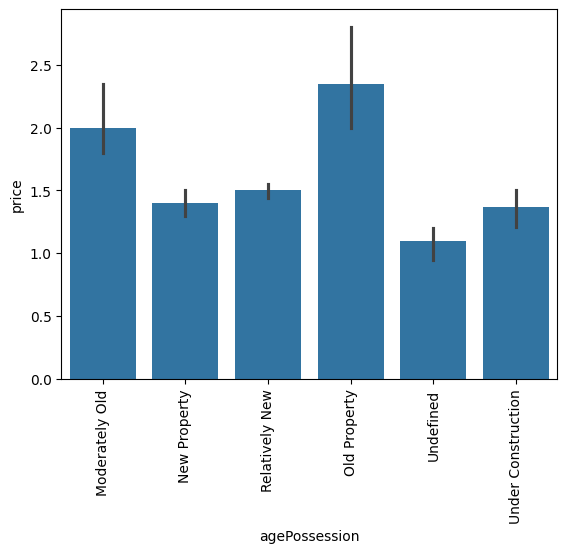

In [68]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

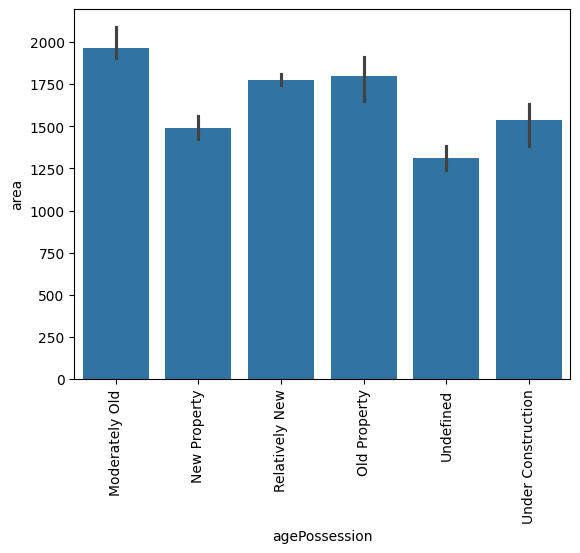

In [69]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

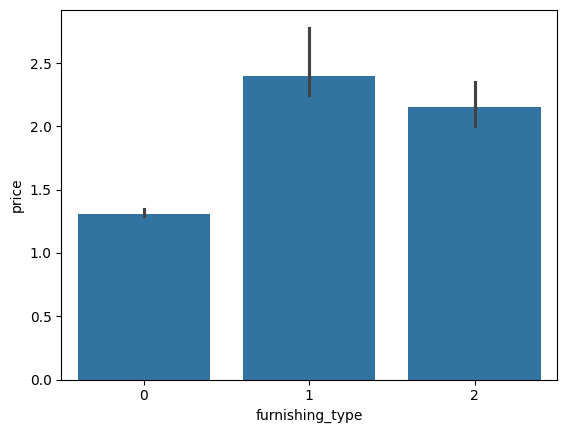

In [70]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price'>

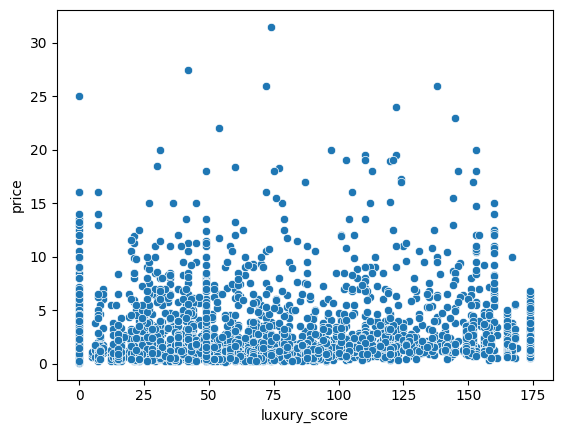

In [73]:
sns.scatterplot(data=df, x='luxury_score', y='price')

In [74]:
### correlation

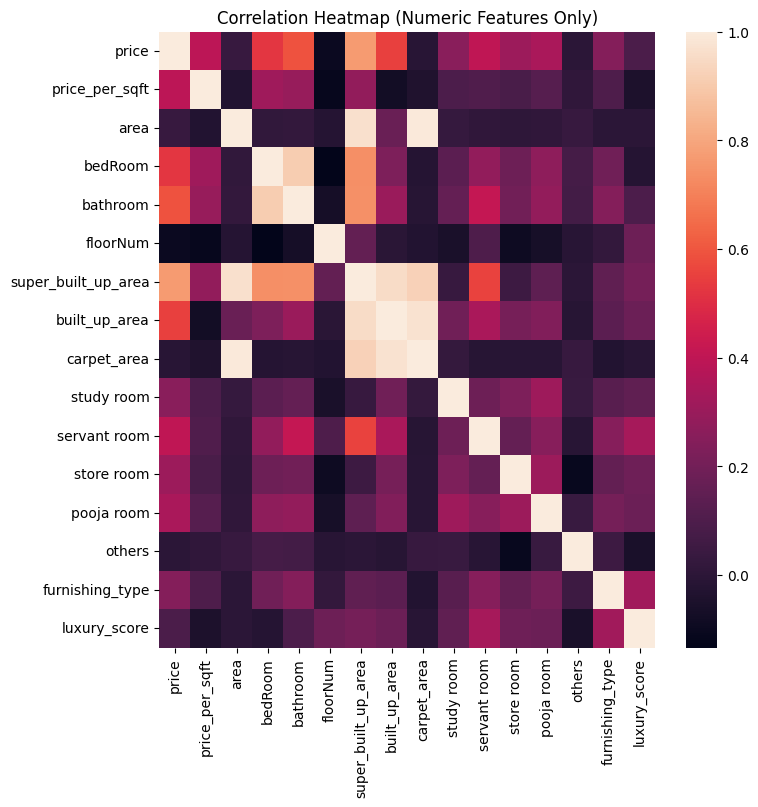

In [84]:

plt.figure(figsize=(8, 8))
sns.heatmap(df.select_dtypes(include='number').corr())

plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [86]:
df.select_dtypes(include='number').corr()['price'].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.769469
bathroom               0.589808
built_up_area          0.551670
bedRoom                0.522906
servant room           0.400854
price_per_sqft         0.391194
pooja room             0.341443
store room             0.309089
study room             0.258032
furnishing_type        0.244398
luxury_score           0.090376
area                   0.034718
others                -0.003584
carpet_area           -0.011322
floorNum              -0.098565
Name: price, dtype: float64

In [87]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,1,South,Moderately Old,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,7,NA,New Property,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,0,West,Moderately Old,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,5,South-East,Relatively New,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,5,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49


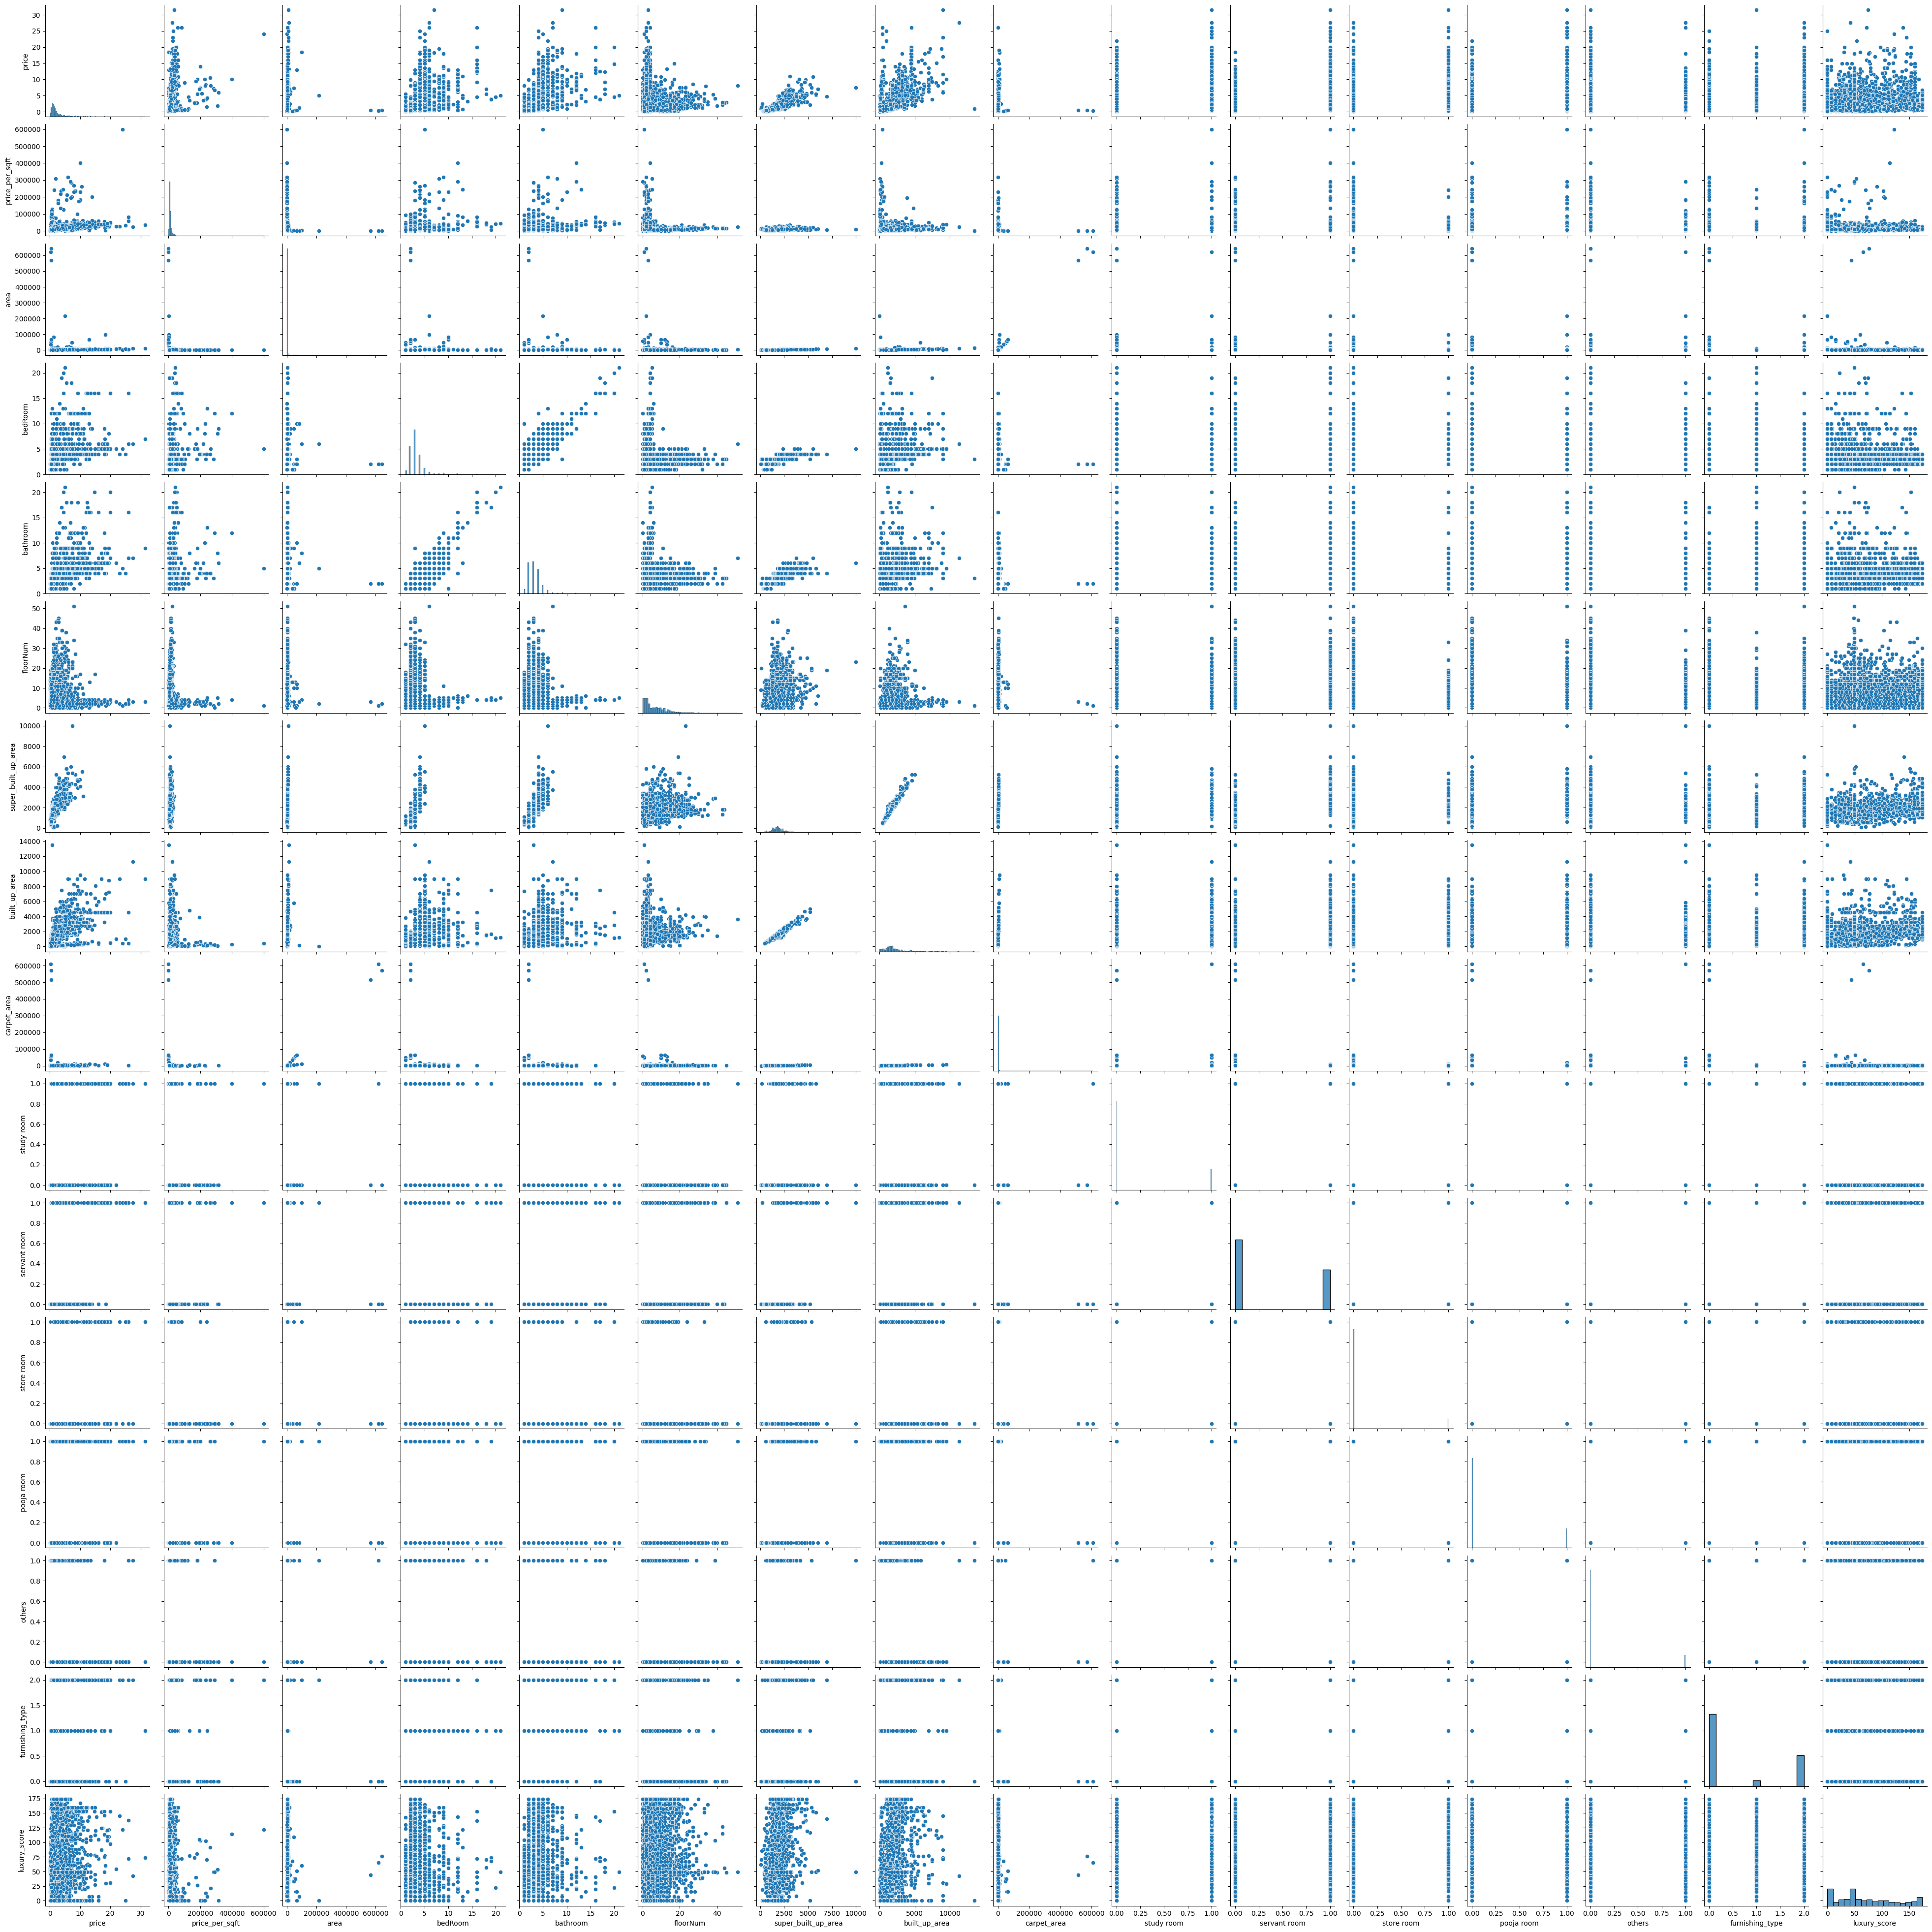

In [88]:
sns.pairplot(df)

In [89]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,1,South,Moderately Old,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,7,NA,New Property,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,0,West,Moderately Old,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,5,South-East,Relatively New,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,5,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49


In [90]:
df.shape

(3674, 23)

In [102]:
# Save the final DataFrame to MySQL
df.to_sql('gurgaon_properties_cleaned_v3', con=mysql_engine, if_exists='replace', index=False)

3674

In [94]:
# Save the final DataFrame to MsSQL
df.to_sql('gurgaon_properties_cleaned_v3', con=mssql_engine, if_exists='replace', index=False)

34